# Thyroid Modeling

# Import libaries

In [50]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import clean data

In [51]:
train_df = pd.read_csv('data/cleaned_thyroid_data.csv')


In [52]:
train_df.head()

,Unnamed: 0,patient_id,age,gender,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis,country_China,country_Germany,country_India,country_Japan,country_Nigeria,country_Russia,country_South Korea,country_UK,country_USA,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Middle Eastern
0,0,1,66,1,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,2,29,1,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,3,86,1,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3,4,75,0,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,4,5,35,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Remove Unnamed: 0 column and patient_id
train_df = train_df.drop(columns = ['Unnamed: 0', 'patient_id'])
train_df.head()

,age,gender,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis,country_China,country_Germany,country_India,country_Japan,country_Nigeria,country_Russia,country_South Korea,country_UK,country_USA,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Middle Eastern
0,66,1,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,29,1,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,86,1,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,75,0,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,35,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Check rows and columns
train_df.shape

(212691, 27)

In [55]:
# Check data types
train_df.dtypes

age                           int64
gender                        int64
family_history                int64
radiation_exposure            int64
iodine_deficiency             int64
smoking                       int64
obesity                       int64
diabetes                      int64
tsh_level                   float64
t3_level                    float64
t4_level                    float64
nodule_size                 float64
thyroid_cancer_risk           int64
diagnosis                     int64
country_China                 int64
country_Germany               int64
country_India                 int64
country_Japan                 int64
country_Nigeria               int64
country_Russia                int64
country_South Korea           int64
country_UK                    int64
country_USA                   int64
ethnicity_Asian               int64
ethnicity_Caucasian           int64
ethnicity_Hispanic            int64
ethnicity_Middle Eastern      int64
dtype: object

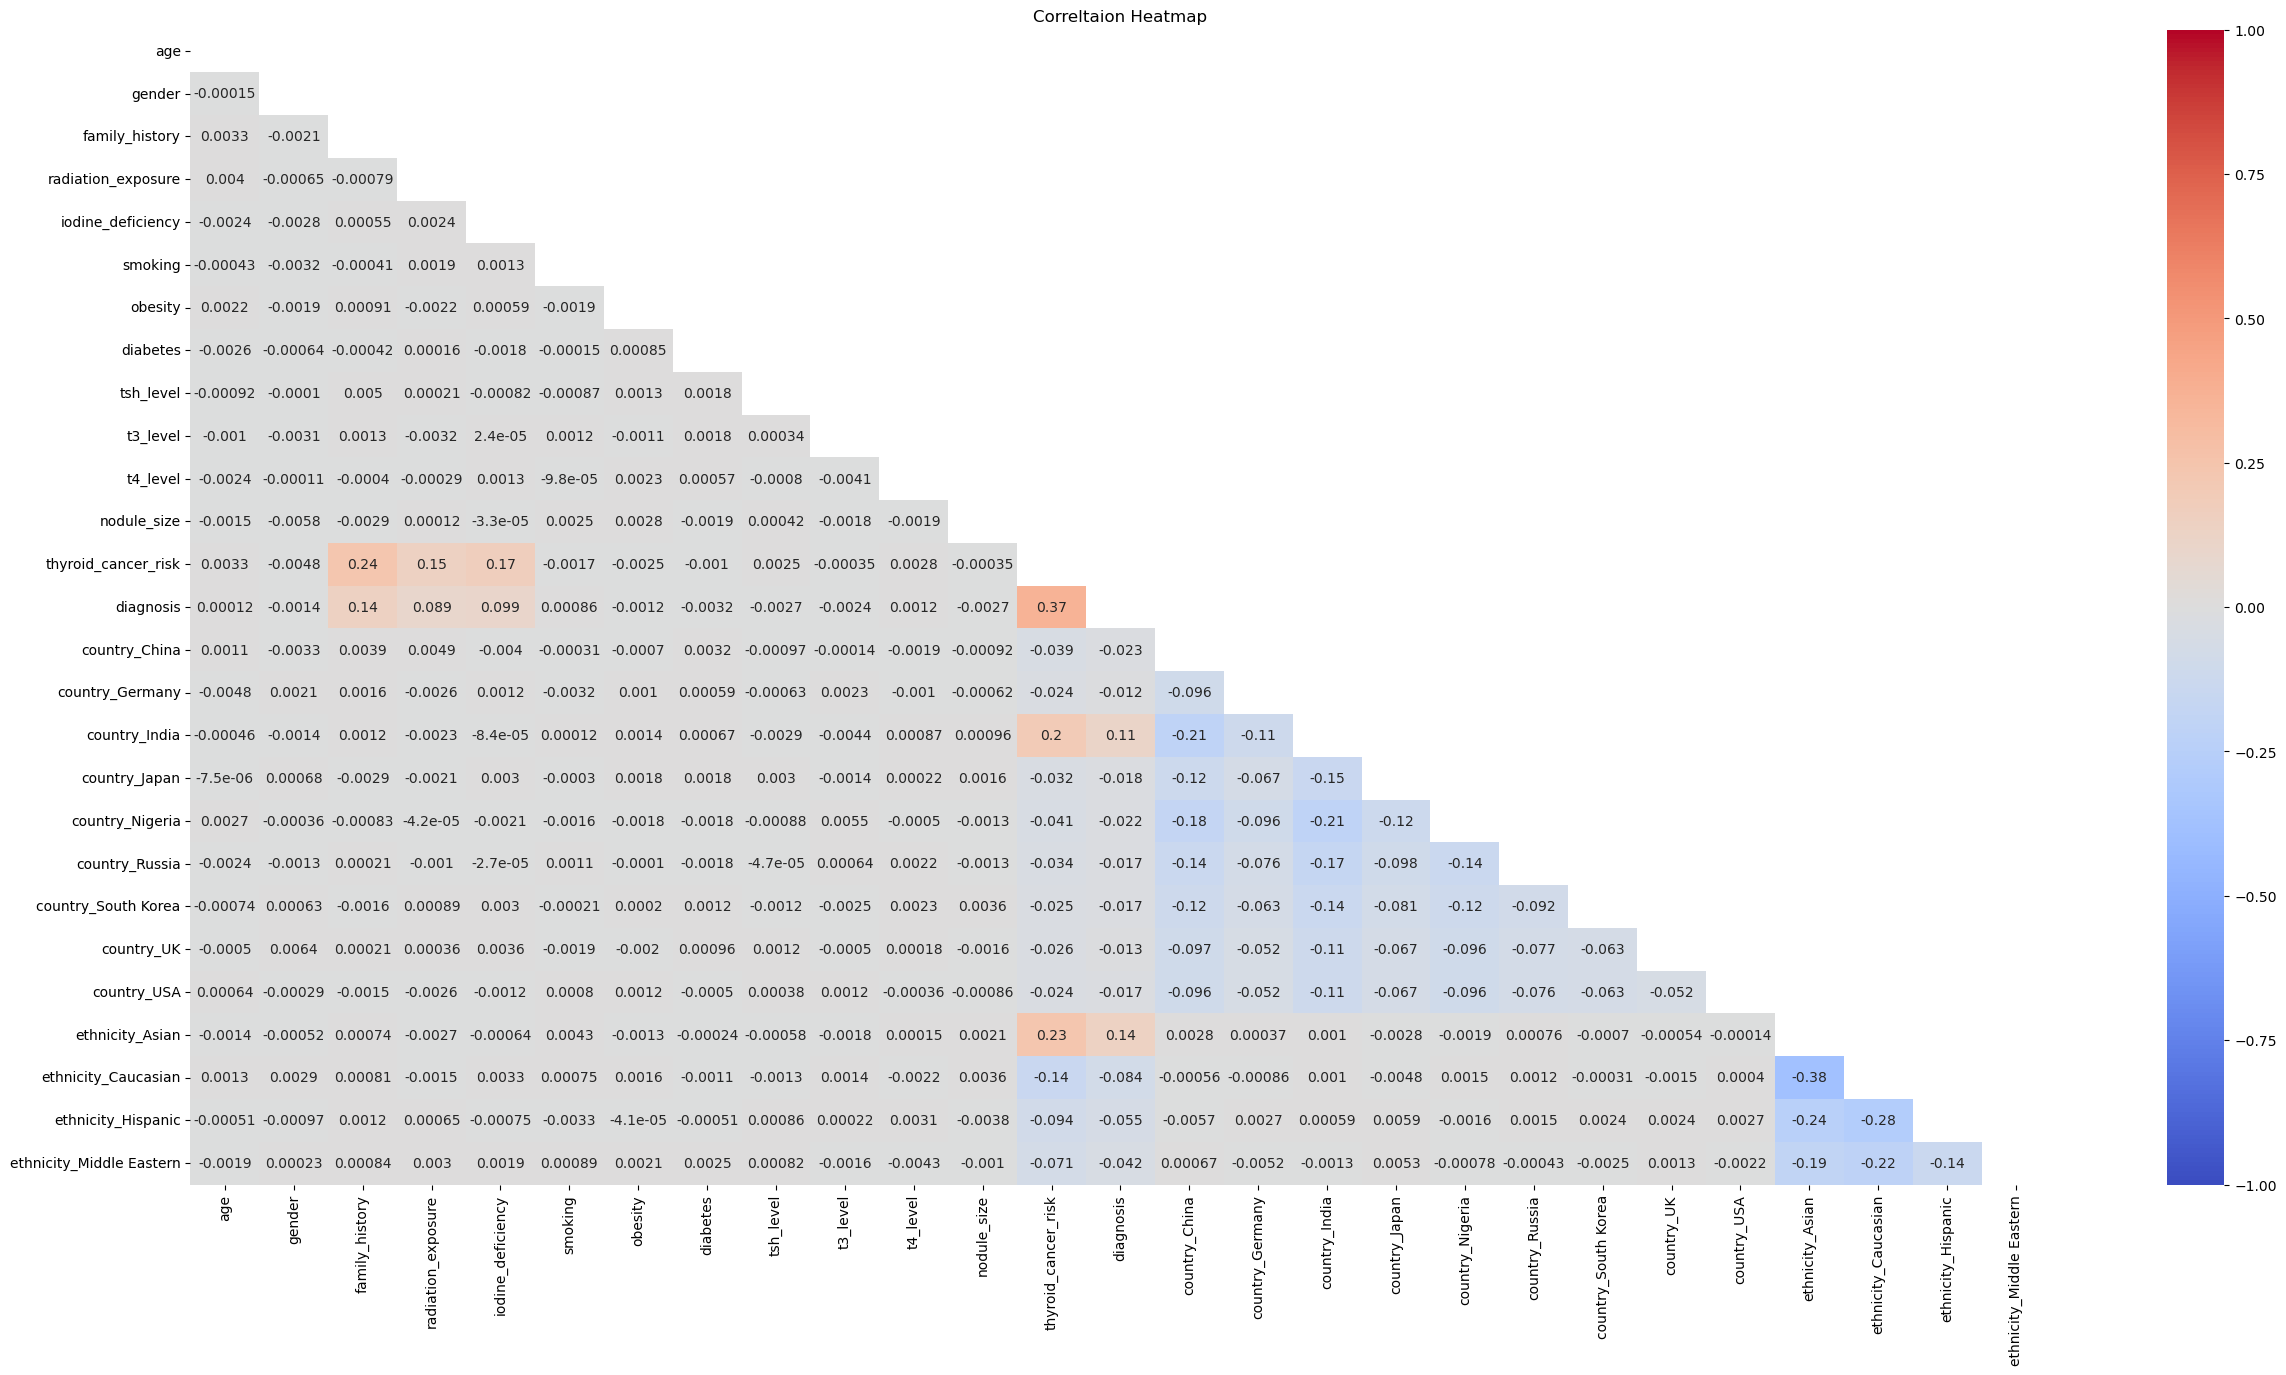

In [56]:
# Make a correlation heatmap
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))

plt.figure(figsize=(30, 15))
sns.heatmap(
    train_df.corr(numeric_only=True),
    mask=mask,  
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)

plt.title('Correltaion Heatmap');

> Looking at the heatmap we can further see other corrilations on the map like thyroid cancer risk, with ethnicity Asian and country Inda. giving me key feature of what are the stonger corrilations to throid cancer

# Creat a Model!

## Model preperation

### Basline Model

In [57]:
train_df['diagnosis'].value_counts(normalize = True)

diagnosis
0    0.767292
1    0.232708
Name: proportion, dtype: float64

In [58]:
# Show all columns
pd.set_option('display.max_columns', None)
train_df.head()

,age,gender,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis,country_China,country_Germany,country_India,country_Japan,country_Nigeria,country_Russia,country_South Korea,country_UK,country_USA,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Middle Eastern
0,66,1,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,29,1,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,86,1,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,75,0,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,35,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Train Test/Split

In [59]:
# Set up X and Y
features = train_df.drop(columns = 'diagnosis')

X = features


y = train_df['diagnosis']

In [60]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

### StandardScaler

In [92]:
# StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Instatiat K-Nearest Neighbors (KNN)

In [62]:
knn = KNeighborsClassifier()

In [63]:
# Fit
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [64]:
# Training accuracy score
knn.score(X_train_sc, y_train)

0.8401998520543136

In [65]:
# Testing accuracy score
knn.score(X_test_sc, y_test)

0.8030015233295094

### Confusion Matrix

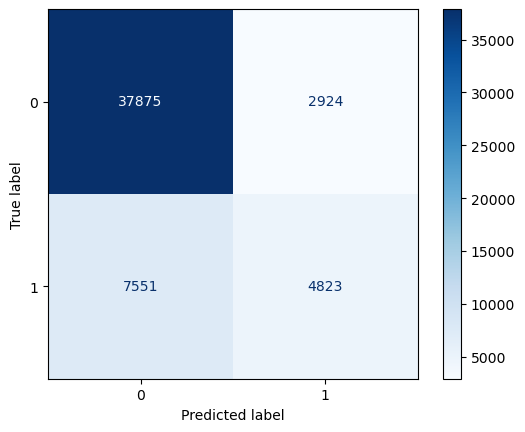

In [66]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [67]:
# review score
knn = KNeighborsClassifier()

knn.fit(X_train_sc, y_train)

knn.score(X_test_sc, y_test)

0.8030015233295094

In [75]:
# Find best number of neighbors for model
scores = []

for k in range(17, 52, 2):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k' : k, 'train_score' : train_score, 'test_score' : test_score})
    
df_score = pd.DataFrame(scores)

In [76]:
df_score

,k,train_score,test_score
0,17,0.827706,0.826077
1,19,0.827480,0.826416
2,21,0.827305,0.826735
3,23,0.827079,0.827017
4,25,0.826979,0.827281
5,27,0.826998,0.827488
6,29,0.826966,0.827826
7,31,0.827054,0.827845
8,33,0.826941,0.827845
9,35,0.826897,0.827939


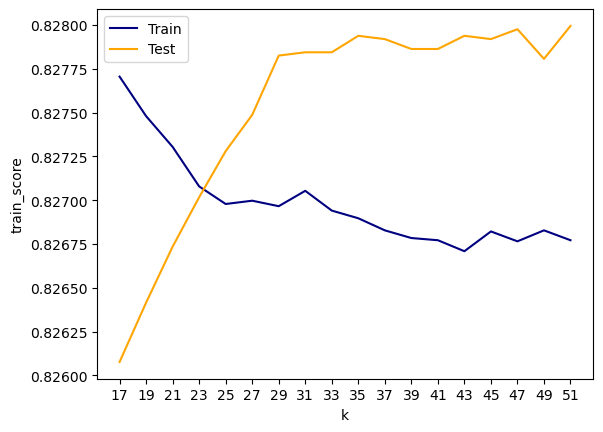

In [78]:
# Visualize this:
sns.lineplot(data = df_score, x = 'k', y = 'train_score', c = 'navy', label = 'Train')
sns.lineplot(data = df_score, x = 'k', y = 'test_score', c = 'orange', label = 'Test')

plt.xticks(range(17, 52, 2));

> We can see that the best Test Score for 51 n_neighbors scoring at __0.827995__.

In [79]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors = 51)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=51)

In [80]:
# New training score
knn.score(X_train_sc, y_train)

0.8267719003498037

In [81]:
# New testing score
knn.score(X_test_sc, y_test)

0.8279954112049348

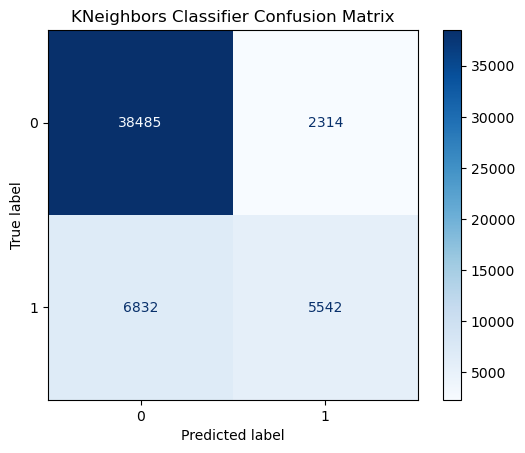

In [91]:
# New Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues')
plt.title('KNeighbors Classifier Confusion Matrix');

> Now we can see the results of having 51 as the n_neighbors, the True Negative has increased in predictioins by 719 predictions as well as the True Positive has increased by 610 correct predictions

# Logistic Regression

In [83]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [84]:
logr.score(X_train_sc, y_train)

0.8260259030328866

In [85]:
logr.score(X_test_sc, y_test)

0.8274500216275177

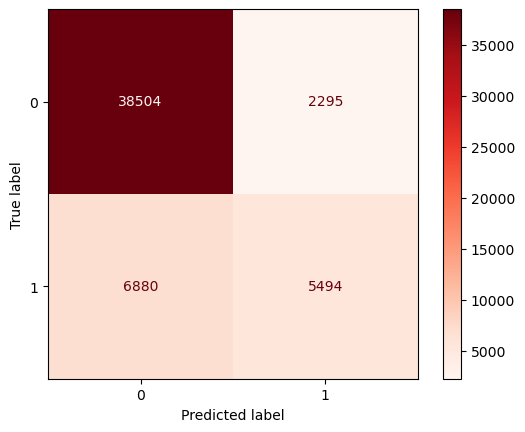

In [86]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

> We can see that the logistis regression has a better score then KNeighborsClassifier

# Random Forest    

In [87]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [88]:
rf.score(X_train_sc, y_train)

0.9999749244599355

In [89]:
rf.score(X_test_sc, y_test)

0.8276568935361932

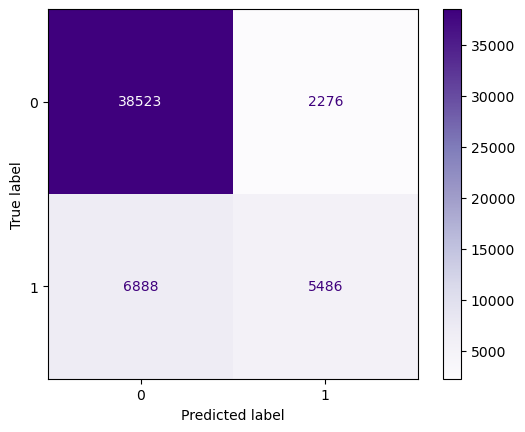

In [90]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');

> Random Forest actually does better then KNeighborsClassifier but less then Logistic Regression